# Participatory Environmental Modelling - Solar Suitability

This Jupyter Notebook guides through the whole process of the data evaluation. Since this should be a guide to make the evaluation for another district in Switzerland based on the Bayesian Network we defined. If you have the required knowledge you can of course also use another network. This Jupyter Notebook mainly is concerned with the clipping of the data.

The functionalities you do not need to be concerned about are in an externe Python file. The file is called `PEM_FS25_SolarSuitability.py`. This file contains all the functions that are used in this Jupyter Notebook.

In [21]:
import PEM_FS25_SolarSuitabilityFuncs as SSF

In the first step we just clip the data to the area of interest. In this case we are interested for data of a district. So we use the corresponding layer of the swissboundaries dataset and define the district we are interested in.

In [22]:
path_data = "data/NCPs/"
path_swissboundaries = "data/swissboundaries/swissBOUNDARIES3D_1_5_TLM_BEZIRKSGEBIET.shp"
district_name = "Surselva"
SSF.clip_area(path_data, path_swissboundaries, district_name)

Now you can find the Clipped Data in the folder `data_sout/NCPs_clipped/`. The data is safed as a TIFF which you now directly can enter into GBay (https://gbay.ethz.ch/) per drag and drop to the corresponding nodes as soon as you uploaded the Bayesian Network. Please don't forget to set a target node.
After running GBay extract the tiff file and safe it in this folder: `data/GBay_Results/`.

We will clip the data to some technical and policy constraints. 
The technical constraints are the following:
- elevation above 1500 m
- energy production potential is above 0.5
- distance to streets and the grid is less than 5km 
The policy constraints are the following:
- are is not inside a BLN area
- area is not inside a national park

All the required data is saved in the folder `data/Constraints/`. You can change the technical constraints in the following code cell. The policy constraints are already defined in the code. 

Please specify the name of your GBay output, so the constraints get applied to the correct file.


In [52]:
minimum_elevation = 1500 # meters
minimum_energy_production = 0.5 
maximum_distance_street = 5000 # meters
maximum_distance_grid = 5000 # meters

gbay_output_path = "data/GBay_Results/GBay_Results.tif"

The following code cell applies the constraints and creates a mask, which then will be applied to the GBay Output.

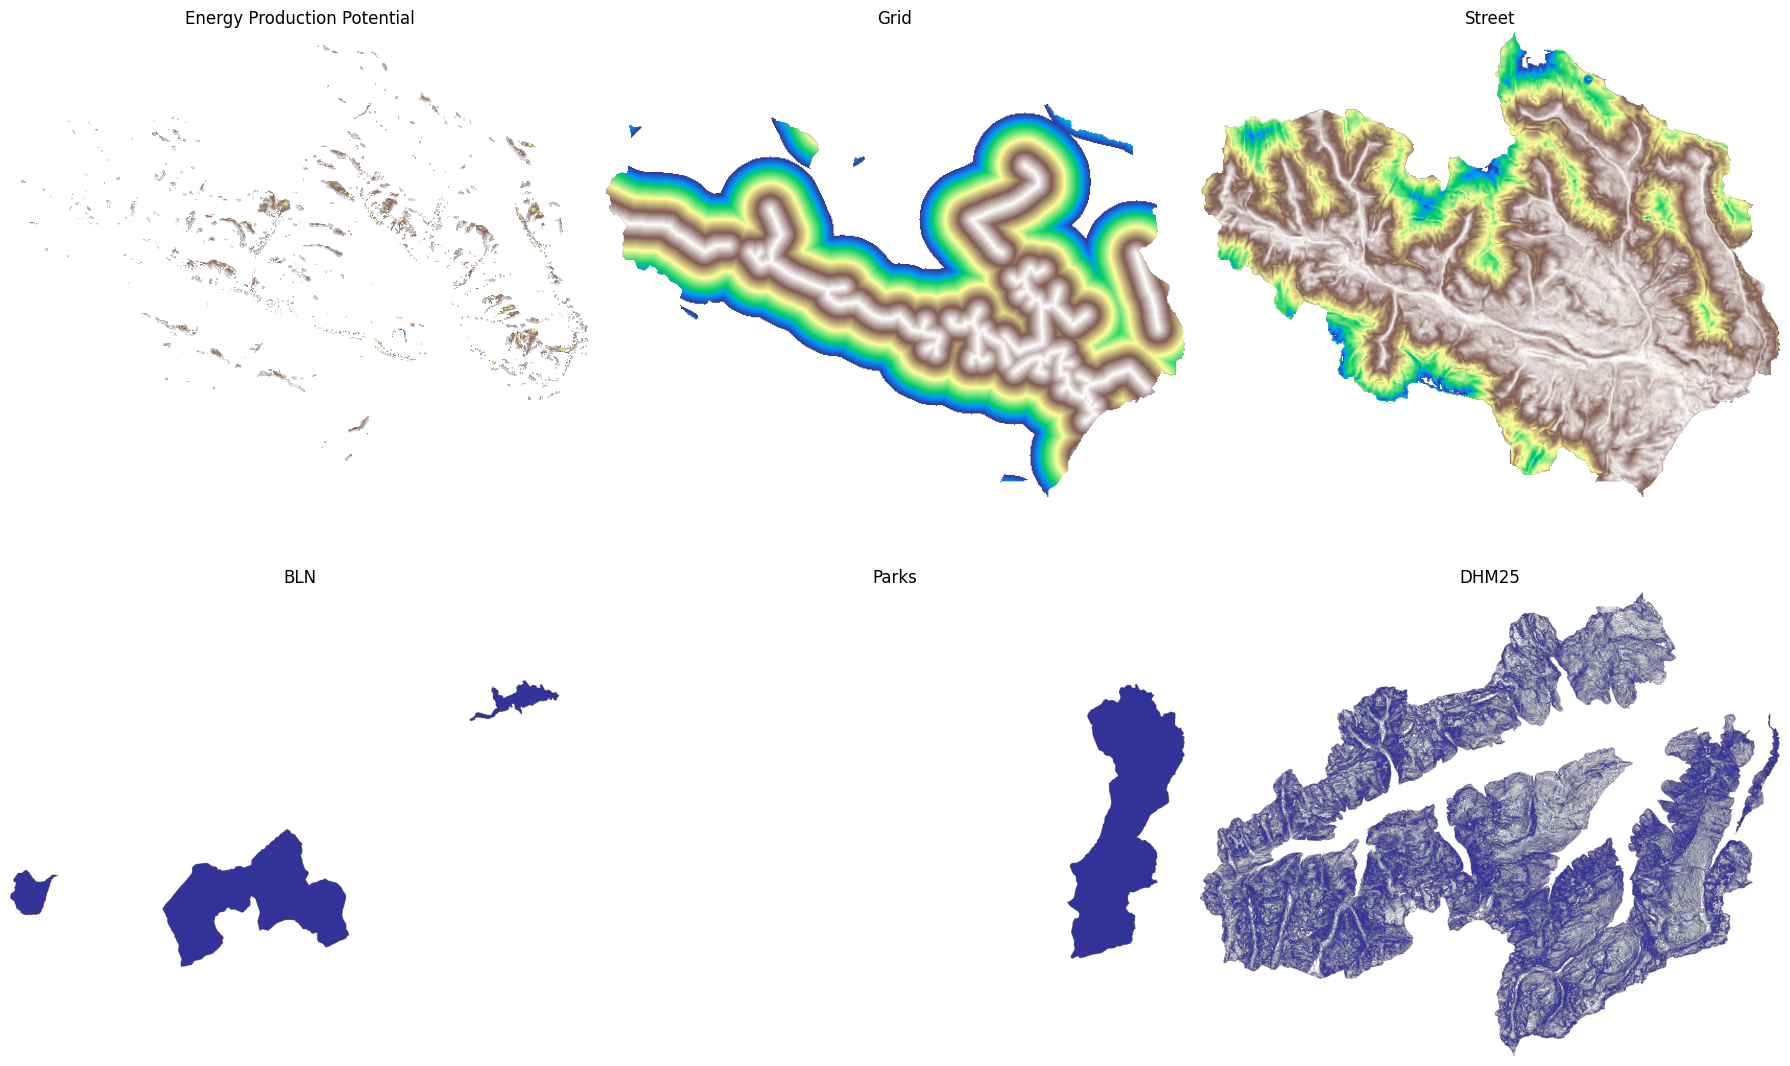

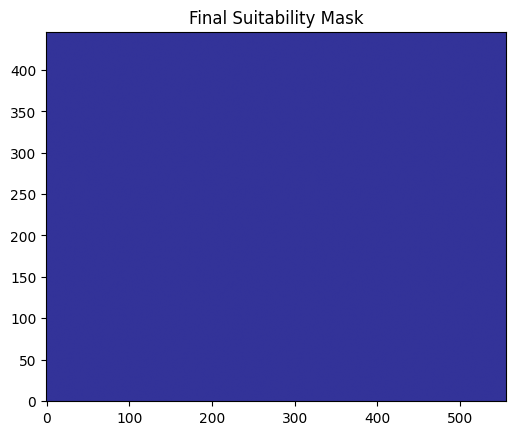

In [96]:
mask = SSF.apply_constraints(gbay_output_path, minimum_elevation, minimum_energy_production, maximum_distance_street, maximum_distance_grid, path_swissboundaries, district_name)

In [95]:
import importlib
import PEM_FS25_SolarSuitabilityFuncs
importlib.reload(PEM_FS25_SolarSuitabilityFuncs)

<module 'PEM_FS25_SolarSuitabilityFuncs' from 'C:\\Users\\PC\\OneDrive\\ETHZ\\FS25\\PEM\\pythonProject\\PEM_FS25_SolarSuitabilityFuncs.py'>